### Refs
- [RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [PubChem](https://pubchem.ncbi.nlm.nih.gov/) - find SDF files for molecules
- [YouTube Tutorial](https://www.youtube.com/watch?v=NozaWUkJ3YM)

### Workflow Suggestions
> After modifying classes from `src` directory, **Restart NoteBook Kernel** is required 
- Recommended action after changing files in `src`: Restart -> Run All

## Imports

In [3]:
from src.core.compound import MBCompound
from src.loader import SDFLoader
from src.utils.renderer import Renderer
from src.utils.ui import Theme
from tests.unit.test_data import SDF_TEST_COMPOUNDS

## RDkit Diamag Calcs


[INF] "2-methylpropan-1-ol.sdf": ✅ Diamag is as expected: -57.9000
[INF] "chlorobenzene.sdf": ✅ Diamag is as expected: -72.1900
[INF] "chalconatronate.sdf": ✅ Diamag is as expected: -95.5800
[INF] "AsIIIAsVAlAl3+.sdf": ✅ Diamag is as expected: -178.7800
[INF] "ArenePbIIPb2+.sdf": ✅ Diamag is as expected: -206.3200
[INF] "[K(crown)][Dy(BC4Ph5)2].sdf": ✅ Diamag is as expected: -788.6400
[INF] "[Ag(TACN)](HSO4).sdf": ✅ Diamag is as expected: -160.9900
[INF] "joint-ring-system.sdf": ✅ Diamag is as expected: -169.8800
[INF] "azabicycle_9_5.sdf": ✅ Diamag is as expected: -116.9200
[INF] "macrocycle_with_rings.sdf": ✅ Diamag is as expected: -519.2400
[ERR] "Be(CH3)2.sdf": ❌ result -29.58 is not expected value: -29.98


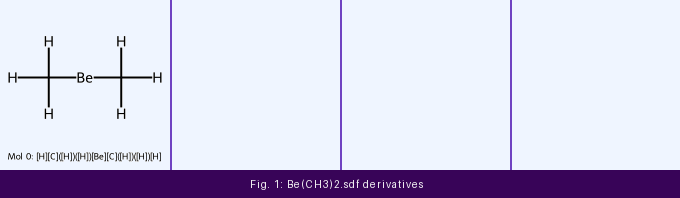

In [4]:
"""Loop through SDF test cases files"""

for test_case in SDF_TEST_COMPOUNDS:
    # Load all MBCompound instances from the given SDF file
    compound: MBCompound = SDFLoader.Load(test_case["sdf_file"])
    # Calc Diamag Contr of a Compound defined by a single SDF file
    diamag_contr: float = compound.CalcDiamagContr()

    # Test Result
    try:
        assert round(diamag_contr, 2) == test_case["expected_diamag"]
        print(
            f'[INF] "{compound.source_file}": ✅ Diamag is as expected: {diamag_contr:.4f}'
        )
    except AssertionError:
        print(
            f'[ERR] "{compound.source_file}": ❌ result {round(diamag_contr, 2)} is not expected value: {test_case["expected_diamag"]}'
        )

        # Draw Molecules in current SDF File
        display(
            Renderer(Theme.LoFi).GetMoleculesGridImg(
                compound.GetMols(),
                label=f"Fig. 1: {test_case['sdf_file']} derivatives\n",
            )
        )